#### IMPORTING LIBRARIES

In [1]:
import pandas as pd # Used for tabular data manipulation
import numpy as np
import matplotlib.pyplot as plt #plotting library

from sklearn.model_selection import train_test_split # used for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler #used for feature scalling
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,roc_curve)
from sklearn.pipeline import Pipeline

# keeps the plots tidy
plt.rcParams['figure.figsize']=(7,4)
plt.rcParams['axes.grid']=True

In [2]:
#load the dataset
data=pd.read_csv("synthetic_sales_data.csv")
data.head()

,order_id,customer_id,signup_date,order_date,region,channel,product_category,price,quantity,discount,returned,support_tickets,rating,churned,gross_value,net_value,days_from_signup
0,100000,2219,2022-11-15,2023-04-13,Western,Online,Accessories,44.89,6,0.27,0,0,4.2,0,269.34,196.6182,149
1,100001,1983,2024-02-27,2024-03-11,Western,Online,CCTV,194.47,1,0.18,0,0,4.1,1,194.47,159.4654,13
2,100002,1683,2023-06-19,2023-09-28,Nairobi,Online,Networking,87.14,6,0.13,0,0,3.5,0,522.84,454.8708,101
3,100003,2710,2022-11-07,2023-04-17,Rift Valley,Store,CCTV,103.68,5,0.01,0,0,NaN,0,518.40,513.2160,161
4,100004,2969,2023-02-17,2023-03-13,Nairobi,Online,CCTV,207.10,7,0.08,0,0,3.7,0,1449.70,1333.7240,24


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          3030 non-null   int64  
 1   customer_id       3030 non-null   int64  
 2   signup_date       3030 non-null   object 
 3   order_date        3030 non-null   object 
 4   region            3030 non-null   object 
 5   channel           3030 non-null   object 
 6   product_category  3030 non-null   object 
 7   price             3030 non-null   float64
 8   quantity          3030 non-null   int64  
 9   discount          3030 non-null   float64
 10  returned          3030 non-null   int64  
 11  support_tickets   3030 non-null   int64  
 12  rating            2968 non-null   float64
 13  churned           3030 non-null   int64  
 14  gross_value       3030 non-null   float64
 15  net_value         3030 non-null   float64
 16  days_from_signup  3030 non-null   int64  


In [4]:
# Both the date columns(signup_date and order_date) are in object format. I need to change to datetime format
data["signup_date"]=pd.to_datetime(data["signup_date"],errors="coerce")
data["order_date"]=pd.to_datetime(data["order_date"],errors="coerce")

In [5]:
# Lets change if the changes made have been applied
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3030 non-null   int64         
 1   customer_id       3030 non-null   int64         
 2   signup_date       3030 non-null   datetime64[ns]
 3   order_date        3030 non-null   datetime64[ns]
 4   region            3030 non-null   object        
 5   channel           3030 non-null   object        
 6   product_category  3030 non-null   object        
 7   price             3030 non-null   float64       
 8   quantity          3030 non-null   int64         
 9   discount          3030 non-null   float64       
 10  returned          3030 non-null   int64         
 11  support_tickets   3030 non-null   int64         
 12  rating            2968 non-null   float64       
 13  churned           3030 non-null   int64         
 14  gross_value       3030 n

In [6]:
data.dtypes #Checks the data types of each column

order_id                     int64
customer_id                  int64
signup_date         datetime64[ns]
order_date          datetime64[ns]
region                      object
channel                     object
product_category            object
price                      float64
quantity                     int64
discount                   float64
returned                     int64
support_tickets              int64
rating                     float64
churned                      int64
gross_value                float64
net_value                  float64
days_from_signup             int64
dtype: object

In [7]:
# Lets check for missing values in the dataset
missing_values=data.isnull().sum()
missing_values

order_id             0
customer_id          0
signup_date          0
order_date           0
region               0
channel              0
product_category     0
price                0
quantity             0
discount             0
returned             0
support_tickets      0
rating              62
churned              0
gross_value          0
net_value            0
days_from_signup     0
dtype: int64

In [8]:
# Out of 3030 rows, theres 62 missing values in rating column. This is about 2 percent of the dataset which is not much.  
# We can either drop the rows or fill the missing rows with mean/median/mode. Since its a small percentage, I choose to drop the rows.
data=data.dropna(subset=["rating"])

In [9]:
data.isnull().sum()

order_id            0
customer_id         0
signup_date         0
order_date          0
region              0
channel             0
product_category    0
price               0
quantity            0
discount            0
returned            0
support_tickets     0
rating              0
churned             0
gross_value         0
net_value           0
days_from_signup    0
dtype: int64

In [10]:
# Lets check if there are any duplicates in the dataset
duplicates=data.duplicated().sum()
duplicates

np.int64(28)

In [11]:
# We have to drop these duplicates
data=data.drop_duplicates()
data.shape

(2940, 17)

#### EXPLORATORY DATA ANALYSIS(EDA)
I will visulaize: distribution, seasonality, segments,relationships and correlations.

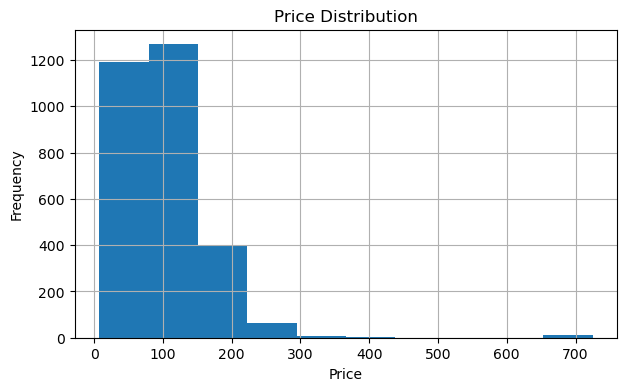

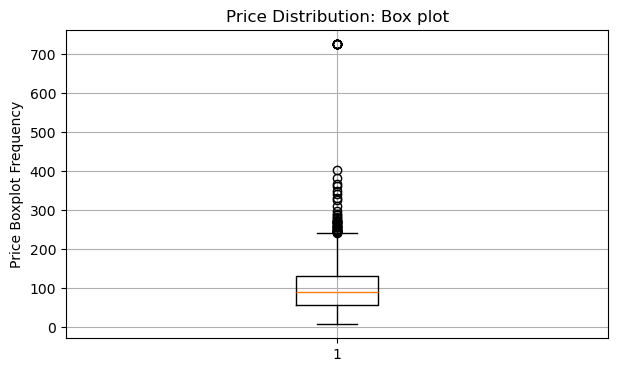

In [12]:
# Histogram: Price
plt.Figure()
plt.hist(data["price"].dropna())
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.show()


#Box plot: Price(to eyeball Outliers)
plt.figure()
plt.boxplot(data["price"].dropna(),vert=True)
plt.title("Price Distribution: Box plot")
plt.ylabel("Price Boxplot Frequency")
plt.show()

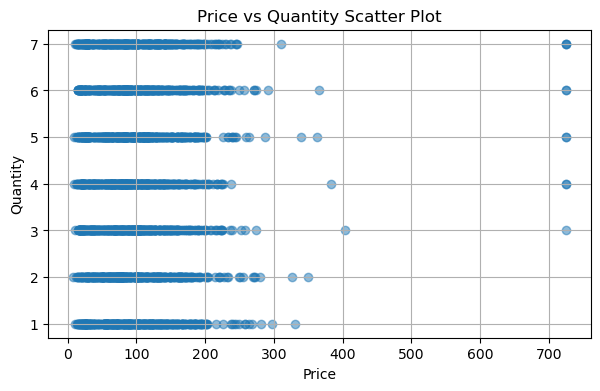

In [13]:
# relationship: Price and Quantinty
plt.figure()
plt.scatter(data["price"],data["quantity"],alpha=0.5)
plt.title("Price vs Quantity Scatter Plot")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

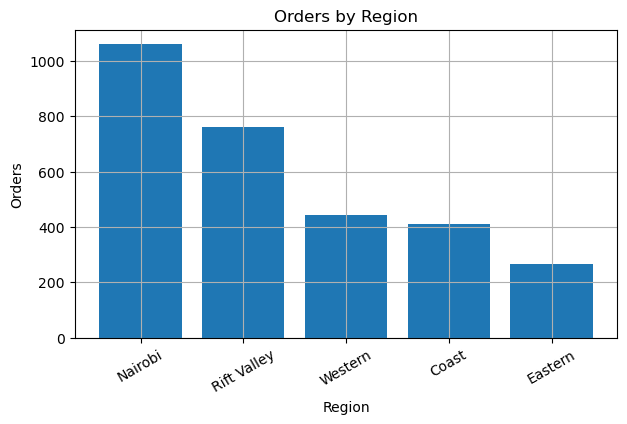

In [14]:
# Orders by region (bar)
counts = data['region'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Orders by Region')
plt.xlabel('Region'); plt.ylabel('Orders')
plt.xticks(rotation=30)
plt.show()

In [15]:
num_features=data.select_dtypes(include=[np.number]).columns.to_list()
num_features

['order_id',
 'customer_id',
 'price',
 'quantity',
 'discount',
 'returned',
 'support_tickets',
 'rating',
 'churned',
 'gross_value',
 'net_value',
 'days_from_signup']

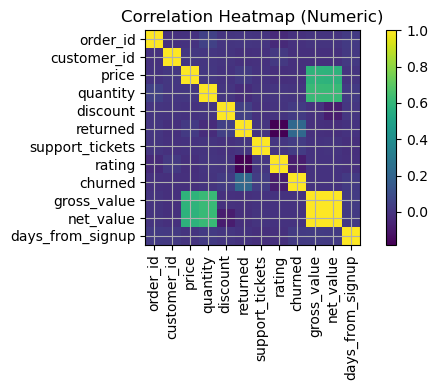

In [16]:
corr=data[num_features].corr()
plt.Figure()
im=plt.imshow(corr,interpolation="nearest")
plt.title('Correlation Heatmap (Numeric)')
plt.xticks(range(len(num_features)), num_features, rotation=90)
plt.yticks(range(len(num_features)), num_features)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

#### FEATURE ENGINEERING(MODEL)


In [17]:
model_data=data.copy()

# one-hot encoding for categorial features
cat_cols=["region","channel","product_category"]
model_data=pd.get_dummies(model_data,columns=cat_cols,drop_first=True)

In [18]:
# selecting features(exclude IDS and  raw timestamps)
feature_cols=[c for c in model_data.columns if c not in ["order_id","customer_id","signup_date","order_date","churned"]]
x=model_data[feature_cols]

In [19]:
y=model_data["churned"]
x.shape,y.shape,x.columns[:8]

((2940, 18),
 (2940,),
 Index(['price', 'quantity', 'discount', 'returned', 'support_tickets',
        'rating', 'gross_value', 'net_value'],
       dtype='object'))

In [20]:
data.head()

,order_id,customer_id,signup_date,order_date,region,channel,product_category,price,quantity,discount,returned,support_tickets,rating,churned,gross_value,net_value,days_from_signup
0,100000,2219,2022-11-15,2023-04-13,Western,Online,Accessories,44.89,6,0.27,0,0,4.2,0,269.34,196.6182,149
1,100001,1983,2024-02-27,2024-03-11,Western,Online,CCTV,194.47,1,0.18,0,0,4.1,1,194.47,159.4654,13
2,100002,1683,2023-06-19,2023-09-28,Nairobi,Online,Networking,87.14,6,0.13,0,0,3.5,0,522.84,454.8708,101
4,100004,2969,2023-02-17,2023-03-13,Nairobi,Online,CCTV,207.10,7,0.08,0,0,3.7,0,1449.70,1333.7240,24
5,100005,2759,2022-10-05,2023-01-21,Nairobi,Store,CCTV,145.55,6,0.12,0,0,5.0,1,873.30,768.5040,108


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False works with sparse-like matrices from dummies
    ('clf', LogisticRegression(max_iter=300))
])

pipe.fit(X_train, y_train)
probs = pipe.predict_proba(X_test)[:, 1]
preds = (probs >= 0.5).astype(int)

acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, probs)

print(f"Accuracy : {acc:.3f}\nPrecision: {prec:.3f}\nRecall   : {rec:.3f}\nF1-score : {f1:.3f}\nROC AUC  : {auc:.3f}")


Accuracy : 0.781
Precision: 0.657
Recall   : 0.134
F1-score : 0.222
ROC AUC  : 0.620
